In [5]:
import os
os.chdir("/Users/kim-wonjin/Documents/CLEWS/Python/Nonlinear/hw6")
import numpy as np
import matplotlib.pyplot as plt
import math

## 1
Import the seasonal rainfall time series and plot it. Check the structure, length, and sampling time of the time series. Can you identify any regime shifts by eye?
Hint: The time axis is given in “before present” (BP). (2P)

(700, 2)
[0.143  0.143  0.1431 0.1431]


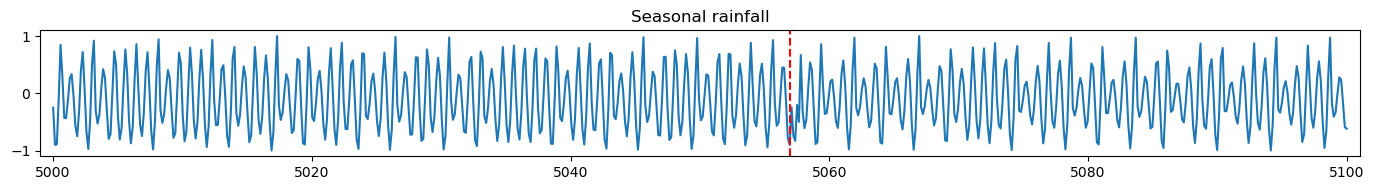

In [35]:
dat = np.loadtxt('seasonal.dat')
print(dat.shape)

bp = dat.T[0]
year = 1950 - bp
rainf = dat.T[1]
interval = np.unique(np.diff(bp))
t_int = 0.143
print(interval)

fig, ax = plt.subplots(figsize = (14, 2)) # figsize is adjusting your whole picture size
ax.plot(dat.T[0], dat.T[1])
ax.set_title("Seasonal rainfall")
plt.xlim(4999, 5101)
plt.axvline(x = 5057, color = 'red', linestyle = '--')
plt.tight_layout()
plt.show()

## 2
Embed the seasonal time series with an embedding dimension of 3 (m = 3) and an embedding delay of 1 (tau = 1). Generate and plot a recurrence plot from the embedded time series. (3P)

In [36]:
def embed(x: np.ndarray, m: int, tau: int) -> np.ndarray:
    """Embeds a scalar time series in m dimensions with time delay tau.

    Parameters
    ----------
    x : np.ndarray
        The scalar time series
    m : int
        Embedding dimmension
    tau : int
        Time delay

    Returns
    -------
    np.ndarray
        The embedded mutli dimensional time series.
    """
    
    n = len(x)
    k = n - (m - 1) * tau
    z = np.zeros((k, m), dtype="float")
    for i in range(k):
        z[i] = [x[i + j * tau] for j in range(m)]

    return np.stack(z)

5000.0 5100.0


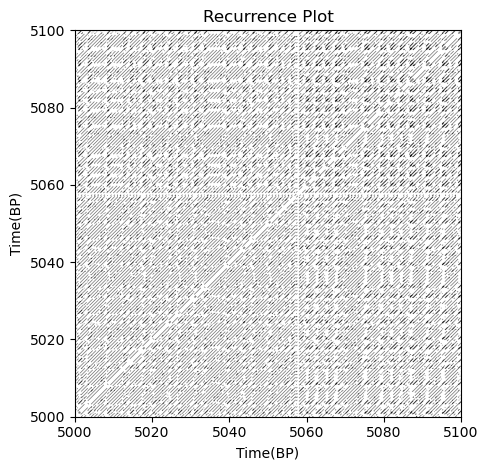

In [45]:
dat_emb = embed(dat.T[1], 3, 1)

distance = np.linalg.norm(dat_emb[:, None] - dat_emb[None, :], axis=2) # recurrence matrix
od = np.sort(np.ravel(distance))
percentage = 0.15
epsilon = np.quantile(od, percentage)

R = (distance < epsilon).astype(int) 
diag = np.diag_indices_from(R) # remove diagonal for avoiding calculate the distance with itself
R[diag] = 0

plt.imshow(R, cmap='binary', origin='lower', extent=(bp[0], bp[-1], bp[0], bp[-1]))
print(np.min(bp), np.max(bp))
plt.title("Recurrence Plot")
plt.ylabel("Time(BP)")
plt.xlabel("Time(BP)")
plt.tight_layout()
plt.show()


## 3
Apply a sliding-window analysis on the seasonal time series to examine whether the seasonality has undergone a regime shift. Use overlapping windows of 10 years (use the sampling time from Task 1 to determine the correct window length) and a step size of 1 year between consecutive windows.
In each window, construct a recurrence matrix (same embedding as above and with the same recurrence rate, e.g. 10%) and compute the corresponding Determinism (DET) using l_min = 2. Describe and explain how DET changes over time, and shortly discuss how DET changes for different l_min values. (10P)

In [ ]:
import recurrence as rec

def sliding_window_DET_with_module(time_bp, ts, win_years = 10, step_years = 1, m = 3, tau = 1, rr = 0.15, l_min = 2):

    # sampling time
    dt = t_int

    # convert years
    win_len  = int(round(win_years  / dt))
    step_len = int(round(step_years / dt))

    DET_values = []
    time_values = []

    N = len(ts)

    for start in range(0, N - win_len, step_len):

        ts_w = ts[start:start + win_len]

        R = rec.rp(ts_w, m=m, tau=tau, e=rr, threshold_by="frr", normed=False)

        # compute DET
        DET = rec.det(R, lmin=l_min)

        DET_values.append(DET)

        mid_time = time_bp[start + win_len // 2]
        time_values.append(mid_time)

    return np.array(time_values), np.array(DET_values)

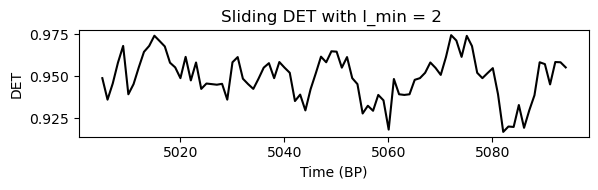

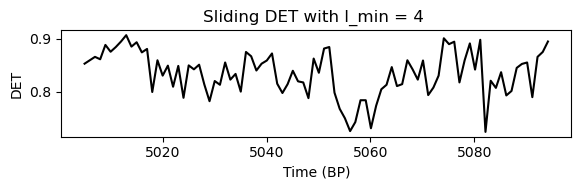

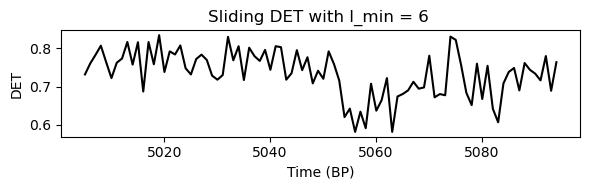

In [65]:

for i in range(1,4):
    t_mid, DET = sliding_window_DET_with_module(bp, rainf, win_years = 10, step_years = 1, m = 3, tau = 1, rr = 0.15, l_min = 2 * i)
    a = 2 * i
    plt.figure(figsize=(6,2))
    plt.plot(t_mid, DET, color='black')
    plt.xlabel("Time (BP)")
    plt.ylabel("DET")
    plt.title(f'Sliding DET with l_min = {a} ')
    plt.tight_layout()
    plt.show()


DET shows one clear reduction around ~5060 BP, indicating a period of reduced regularity.
Smaller l_min gives higher, smoother DET.
Larger l_min gives lower DET and highlights irregularities more strongly.

## 4 
Travel back to the future to report your results to Doc Brown. Plot the seasonal time series again in one figure and display the variations in DET in another plot below it. Assess whether the seasonality has undergone a regime shift and identify the respective time period, if possible. (5P)

Text(0.5, 1.0, 'DET variatons')

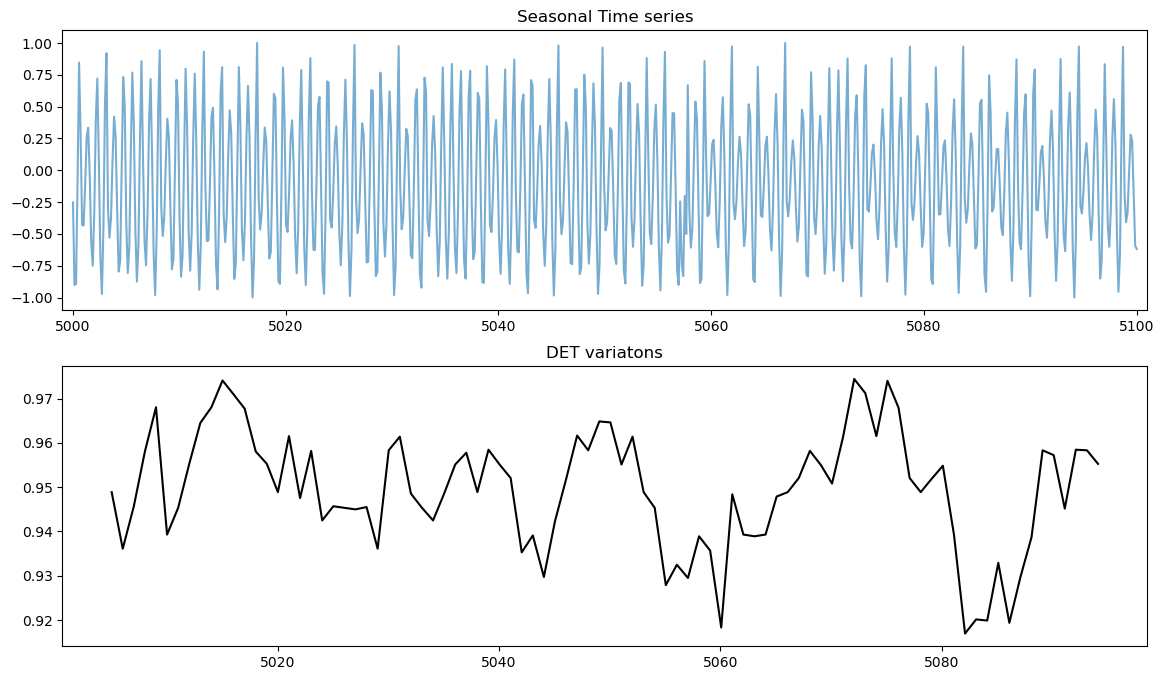

In [75]:
fig, axs = plt.subplots(2, 1, figsize=(14, 8))
t_mid, DET = sliding_window_DET_with_module(bp, rainf, win_years = 10, step_years = 1, m = 3, tau = 1, rr = 0.15, l_min = 2)
axs[0].plot(bp, rainf, alpha=0.6)
axs[0].set(xlim = [4999,5101])
axs[0].set_title("Seasonal Time series")
axs[1].plot(t_mid, DET, color='black')
axs[1].set_title("DET variatons")

short-lived regime change or anomaly in the seasonality around 5050–5060 BP

## Bonus
Investigate how the resulting Determinism (DET) values change when you choose different lengths for the sliding window. Compare short, medium, and long windows and explain how window size affects the detection of regime shifts. Why is the suggested window length of 100 samples (from the previous Task 6.3) a reasonable choice?



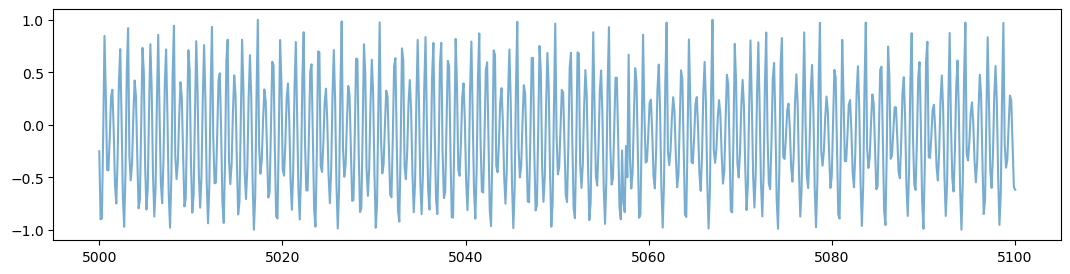

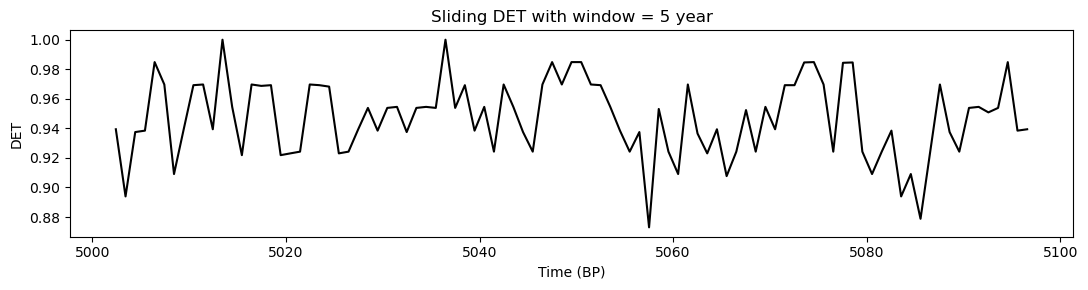

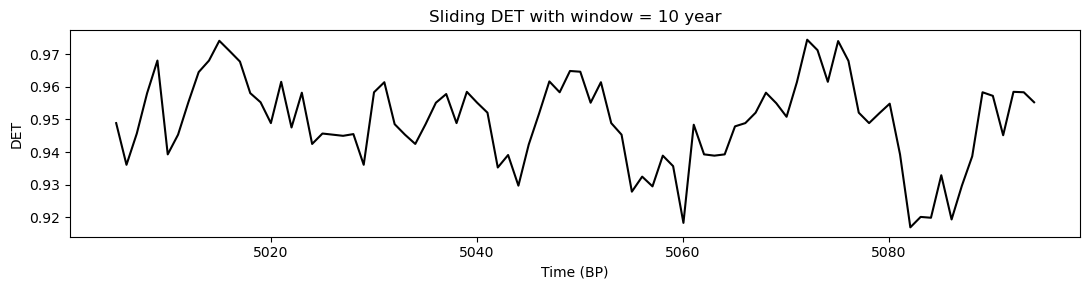

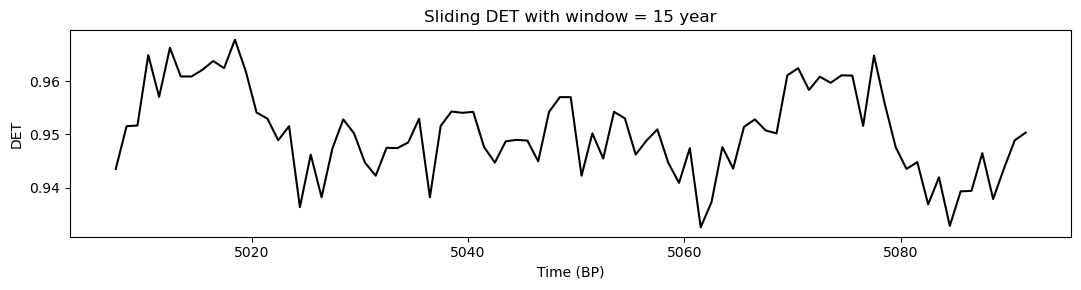

In [85]:
plt.figure(figsize=(13,3))
plt.plot(bp, rainf, alpha=0.6)

for i in range(1,4):
    t_mid, DET = sliding_window_DET_with_module(bp, rainf, win_years = 5 * i, step_years = 1, m = 3, tau = 1, rr = 0.15, l_min = 2)
    window_years = 5 * i
    plt.figure(figsize=(11,3))
    plt.plot(t_mid, DET, color='black')
    ax.set(xlim=(4999, 5101))
    plt.xlabel("Time (BP)")
    plt.ylabel("DET")
    plt.title(f'Sliding DET with window = {window_years} year')
    plt.tight_layout()
    plt.show()

When using short windows (5 years), the DET values fluctuate strongly from window to window. The method becomes very sensitive to noise.
For long windows (15 years), DET becomes smooth and stable, but local changes are smeared out. The drop around the regime shift is broadened, so the timing of the transition cannot be identified clearly.
A medium window length (10 years) provides a good compromise. It contains enough points to obtain robust statistics for the recurrence plot and DET, but it is still short enough to resolve changes in seasonality in time.